
<center>
<hr>
<hr>
<font style="font-size:5.4em ; color:black'" > 
<span style="background : yellow">
#2 Root Finding
</span>
</font>
<hr>
<hr>
</center>


In [1]:
%matplotlib inline
from IPython.display import display,Latex,Math,HTML
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<center>
<hr>
<font size="20" color='Blue' >Bi-section Method</font>
<hr>
</center>

In [2]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = x^3-0.165x^2+3.993 \\times 10^{{-4}}=0
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

In [3]:
def func(x):
    return x**3 - 0.165*x**2 + 3.993*10**-4

In [4]:
xx = [(0.0,0.11)]
xl = xx[0][0]
xu = xx[0][1]
for i in range(0,10):
    x = (xl+xu)/2
    print(f"{i+1:2} : xl = {xl:0.5f}, xm = {x:.5f}, xu = {xu:0.5f}  f(x) = {func(x):.4e}")
    if func(x)*func(xl)<0:
        xu = x
    else:
        xl = x
    xx.append((xl,xu))

 1 : xl = 0.00000, xm = 0.05500, xu = 0.11000  f(x) = 6.6550e-05
 2 : xl = 0.05500, xm = 0.08250, xu = 0.11000  f(x) = -1.6222e-04
 3 : xl = 0.05500, xm = 0.06875, xu = 0.08250  f(x) = -5.5632e-05
 4 : xl = 0.05500, xm = 0.06187, xu = 0.06875  f(x) = 4.4843e-06
 5 : xl = 0.06187, xm = 0.06531, xu = 0.06875  f(x) = -2.5939e-05
 6 : xl = 0.06187, xm = 0.06359, xu = 0.06531  f(x) = -1.0804e-05
 7 : xl = 0.06187, xm = 0.06273, xu = 0.06359  f(x) = -3.1768e-06
 8 : xl = 0.06187, xm = 0.06230, xu = 0.06273  f(x) = 6.4973e-07
 9 : xl = 0.06230, xm = 0.06252, xu = 0.06273  f(x) = -1.2646e-06
10 : xl = 0.06230, xm = 0.06241, xu = 0.06252  f(x) = -3.0768e-07


In [5]:
for x in xx: print(f"({x[0]:0.5f}, {x[1]:0.5f})")

(0.00000, 0.11000)
(0.05500, 0.11000)
(0.05500, 0.08250)
(0.05500, 0.06875)
(0.06187, 0.06875)
(0.06187, 0.06531)
(0.06187, 0.06359)
(0.06187, 0.06273)
(0.06230, 0.06273)
(0.06230, 0.06252)
(0.06230, 0.06241)


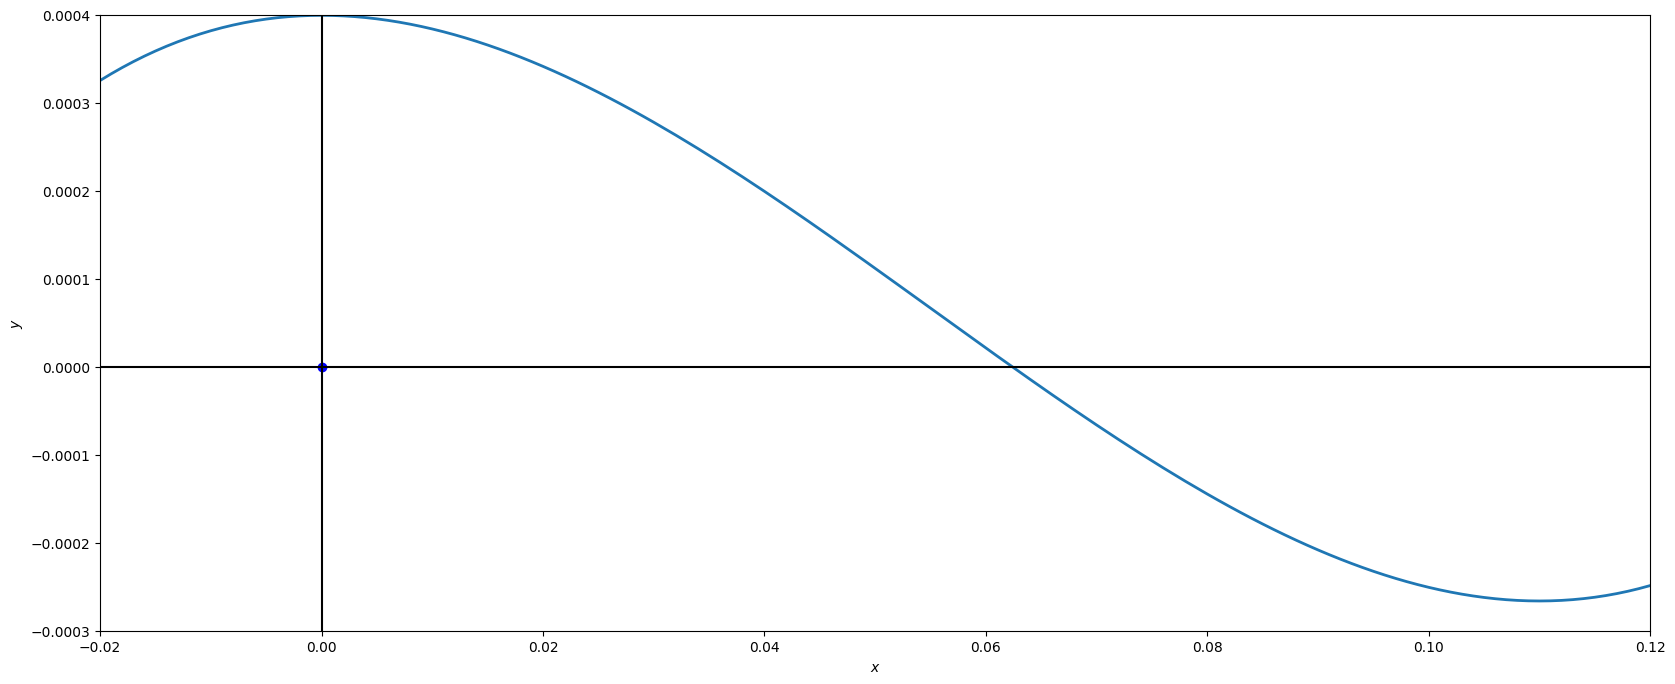

In [6]:
xdata = [i/1000.0-0.1 for i in range(0, 300)]
ydata = [func(i) for i in xdata] 

# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
line, = ax.plot(xdata, ydata, lw=2)
ball = plt.Circle((0, 0), 0.00010,fill=True, color='r')
# ax.set_aspect('equal')
ax.figure.set_figheight(8)
ax.figure.set_figwidth(20)
# ax.set_aspect(0.14/0.0007)
ax.hlines(0, -0.1, 0.2, colors='k', linestyles='solid')
ax.vlines(0, -0.003, 0.007, colors='k', linestyles='solid')    
ax.set_ylim(-0.0003, 0.0004)
ax.set_xlim(-0.02, 0.12)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# ax.add_patch(ball)
ax.scatter([0], [0], color='b')

In [7]:
def update(frame):
    ax.vlines(xx[frame][0], -0.0003, 0.0004, colors='r', linestyles='dashed')
    ax.vlines(xx[frame][1], -0.0003, 0.0004, colors='r', linestyles='dashed')
    ball.center = ((xx[frame][0]+xx[frame][1])/2.0, 0)
    ax.scatter((xx[frame][0]+xx[frame][1])/2, [0], color='b')
    # ax.add_patch(ball)

anim = animation.FuncAnimation(fig, update, frames=range(0, len(xx)), interval=1000, repeat=False)
HTML(anim.to_jshtml())
# plt.show()

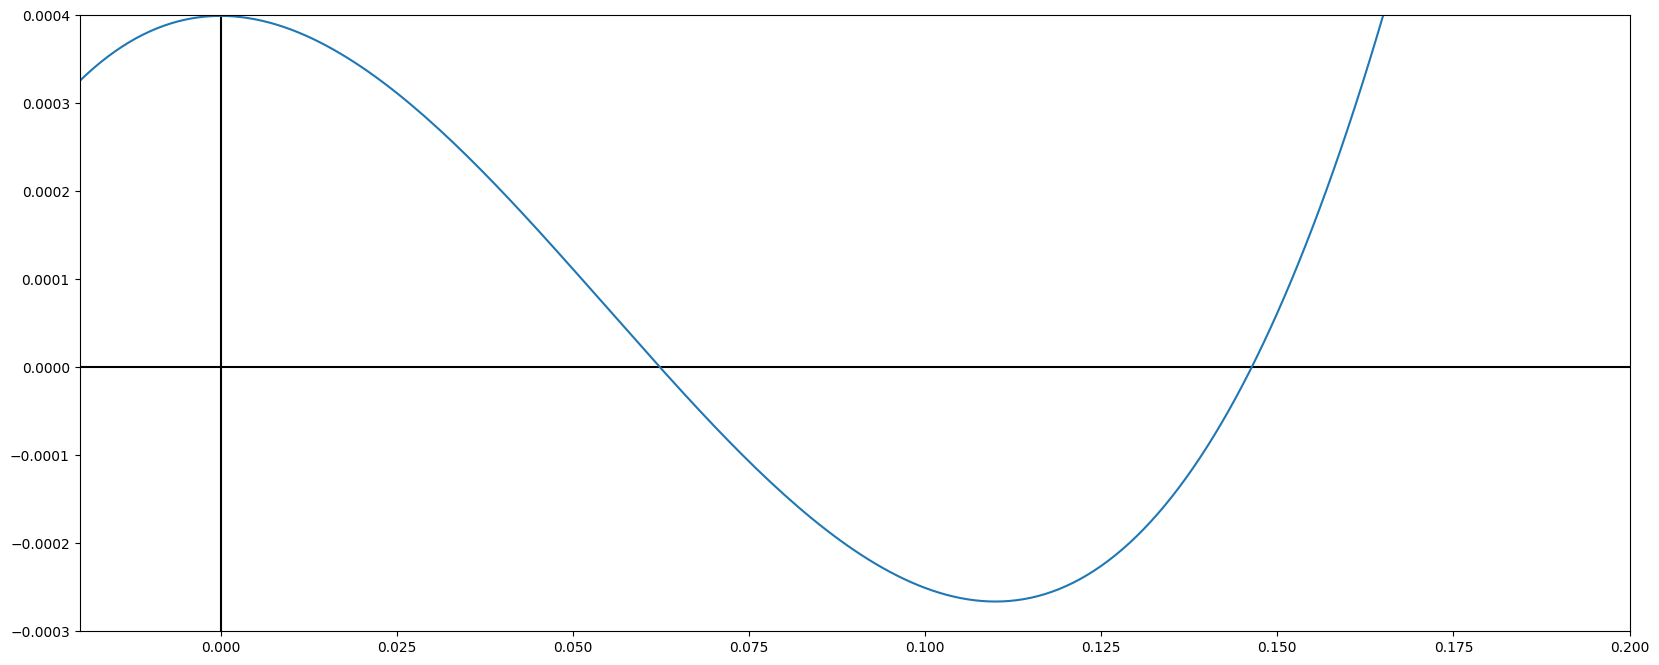

In [8]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
# ax.set_aspect('equal')
ax.figure.set_figheight(8)
ax.figure.set_figwidth(20)
ax.hlines(0, -0.1, 0.2, colors='k', linestyles='solid')
ax.vlines(0, -0.003, 0.007, colors='k', linestyles='solid')
# ax.vlines(0.02, -0.003, 0.007, colors='r', linestyles='dashed')
ax.set_ylim(-0.0003, 0.0004)
ax.set_xlim(-0.02, 0.20)
x = [i/1000.0-0.1 for i in range(0, 300)]
y = [func(i) for i in x]
line, = ax.plot(x, y)

<center>
<hr>
<font size="20" color='Blue' >Newton-Rapson Method</font>
<hr>
</center>

In [9]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = x^3-0.165x^2+3.993 \\times 10^{{-4}}=0
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

In [1]:
def func(x):
    return x**3 - 0.165*x**2 + 3.993*10**-4

def dfunc(x):
    return 3*x**2 - 0.165*2*x   

In [2]:
xx = [0.05] #[0.016]
x0 = xx[0]
for i in range(0,10):
    x = x0 - func(x0)/dfunc(x0)
    print(f"{i+1:2} : x0 = {x0:0.5f}, x1 = {x:.5f}  f(x) = {func(x):.4e}")
    x0 = x
    xx.append(x)

 1 : x0 = 0.05000, x1 = 0.06242  f(x) = -3.9778e-07
 2 : x0 = 0.06242, x1 = 0.06238  f(x) = 4.4294e-11
 3 : x0 = 0.06238, x1 = 0.06238  f(x) = 5.4210e-19
 4 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00
 5 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00
 6 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00
 7 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00
 8 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00
 9 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00
10 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00


In [12]:
for x in xx: print(f"{x:0.5f}")

0.01600
0.09604
0.03716
0.06459
0.06236
0.06238
0.06238
0.06238
0.06238
0.06238
0.06238


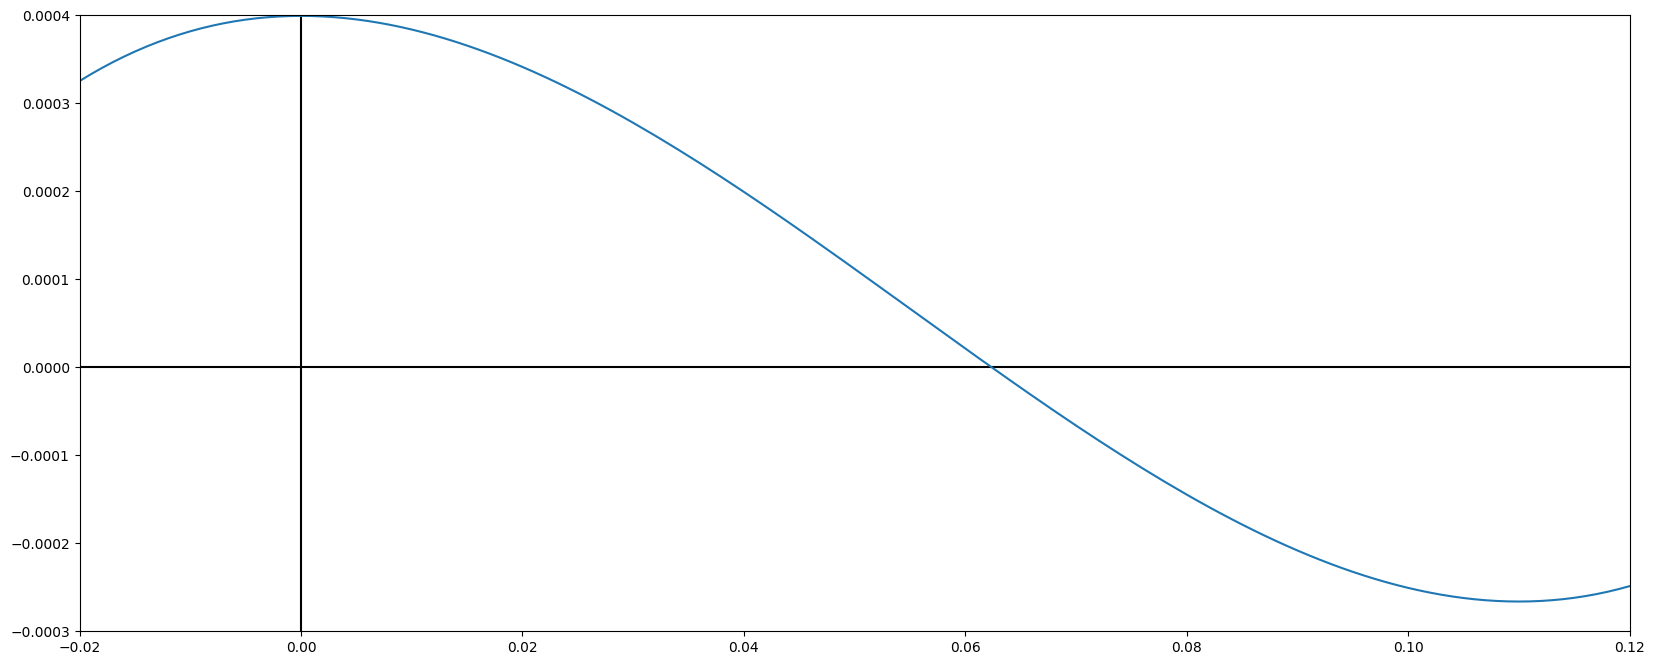

In [13]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
# ax.set_aspect('equal')
ax.figure.set_figheight(8)
ax.figure.set_figwidth(20)
ax.hlines(0, -0.1, 0.2, colors='k', linestyles='solid')
ax.vlines(0, -0.003, 0.007, colors='k', linestyles='solid')
# ax.vlines(0.02, -0.003, 0.007, colors='r', linestyles='dashed')
ax.set_ylim(-0.0003, 0.0004)
ax.set_xlim(-0.02, 0.12)
x = [i/1000.0-0.1 for i in range(0, 300)]
y = [func(i) for i in x]
line, = ax.plot(x, y)

In [14]:
def update(frame):
    ax.vlines(xx[frame], -0.0003, 0.0004, colors='r', linestyles='dashed')
    
    ball.center = (xx[frame], 0)
    ax.scatter(xx[frame], [0], color='b')
    # ax.add_patch(ball)

anim = animation.FuncAnimation(fig, update, frames=range(0, len(xx)), interval=1000, repeat=False)
HTML(anim.to_jshtml())
# plt.show()

In [15]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = x^3-0.03x^2+2.4 \\times 10^{{-6}}=0
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

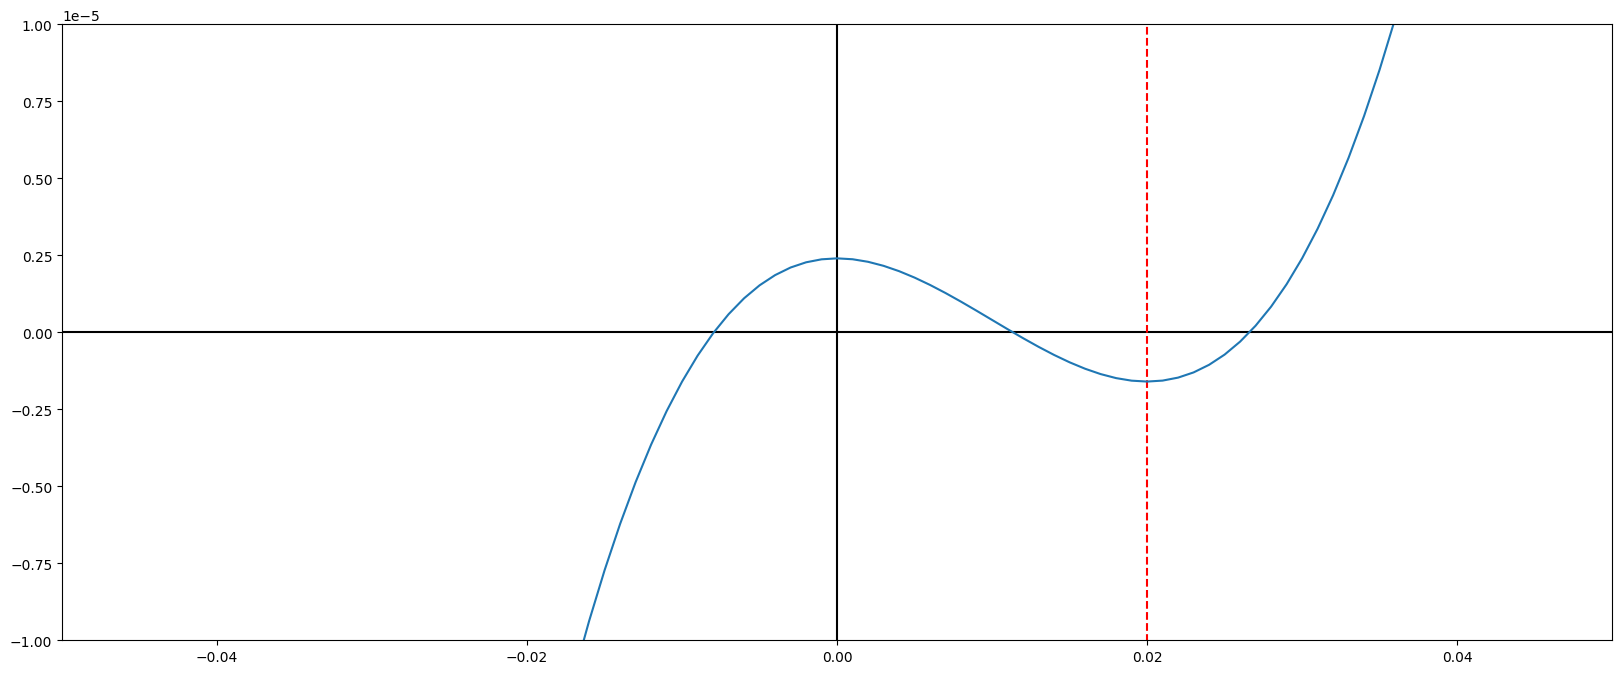

In [16]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
# ax.set_aspect('equal')
ax.figure.set_figheight(8)
ax.figure.set_figwidth(20)
ax.hlines(0, -0.1, 0.2, colors='k', linestyles='solid')
ax.vlines(0, -0.003, 0.007, colors='k', linestyles='solid')
ax.vlines(0.02, -0.003, 0.007, colors='r', linestyles='dashed')
ax.set_ylim(-0.00001, 0.00001)
ax.set_xlim(-0.05, 0.05)
x = [i/1000.0-0.1 for i in range(0, 300)]
y = [i**3-0.03*i**2+2.4*10**-6 for i in x]
line, = ax.plot(x, y)

<center>
<hr>
<font size="20" color='Blue' >Secant Method</font>
<hr>
</center>

In [17]:
Latex(f""" \\begin{{equation*}} \\Huge
      f(x) = x^3-0.165x^2+3.993 \\times 10^{{-4}}=0
      \\end{{equation*}} 
      """)

<IPython.core.display.Latex object>

In [18]:
def func(x):
    return x**3 - 0.165*x**2 + 3.993*10**-4


In [19]:
xx = [0.02, 0.05]
x0,x1 = xx[0],xx[1]
for i in range(0,10):
    if abs(func(x0) - func(x1)) < 1e-14: 
        break
    x = x0 - func(x0)*(x0-x1)/(func(x0) - func(x1))
    print(f"{i+1:2} : x0 = {x0:0.5f}, x1 = {x1:.5f}  f(x) = {func(x):.4e}")
    x0 = x1
    x1 = x
    xx.append(x)

 1 : x0 = 0.02000, x1 = 0.05000  f(x) = -1.9812e-05
 2 : x0 = 0.05000, x1 = 0.06461  f(x) = -3.2852e-07
 3 : x0 = 0.06461, x1 = 0.06241  f(x) = 2.0252e-09
 4 : x0 = 0.06241, x1 = 0.06238  f(x) = -1.8576e-13
 5 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00
 6 : x0 = 0.06238, x1 = 0.06238  f(x) = 0.0000e+00


<center>
<hr>
<font size="20" color='Blue' >The end...</font>
<hr>
</center>